In [ ]:
#Ananya Dahal
#2408840


#import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

In [ ]:
# STEP 2: Upload the CSV File and load the dataset

from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/AI WEEK-3 (Responses) - Form responses 1 (1).csv'
df = pd.read_csv(file_path)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Timestamp,Name,"Q1. How many messages do you send in a typical day using messaging apps (e.g., WhatsApp, Messenger, Viber, etc.)?",Q2. Which messaging app do you use most frequently?,Q3. What is your age group?,Q4. Do you consider yourself a frequent texter?,Q5. Do you use messaging apps more for:
0,31/07/2025 11:56:39,Shreya Shrestha,20-30,WhatsApp,18–21,Yes,Academic/Group projects
1,31/07/2025 11:56:56,Aaryan Aryal,40-50,WhatsApp,18–21,Sometimes,Personal chats
2,31/07/2025 11:57:33,Subrat,20-30,Instagram,22–25,Yes,Personal chats
3,31/07/2025 11:59:35,Miyamoto,40-50,Instagram,18–21,Yes,Both equally
4,31/07/2025 12:00:17,Abison Sharma,10-20,Instagram,Above 25,No,Personal chats


In [ ]:
# Rename the column name for easier use

df = df.rename(columns={
    df.columns[2]: "Messages_Per_Day"
})

In [ ]:
#STEP 4: Create Frequency Table

frequency_table = df["Messages_Per_Day"].value_counts().sort_index()
total_responses = frequency_table.sum()

In [ ]:
#Compute Empirical PMF

empirical_pmf = frequency_table / total_responses

In [ ]:
# Combine into a DataFrame
pmf_table = pd.DataFrame({
    "Frequency": frequency_table,
    "Empirical PMF": empirical_pmf
})

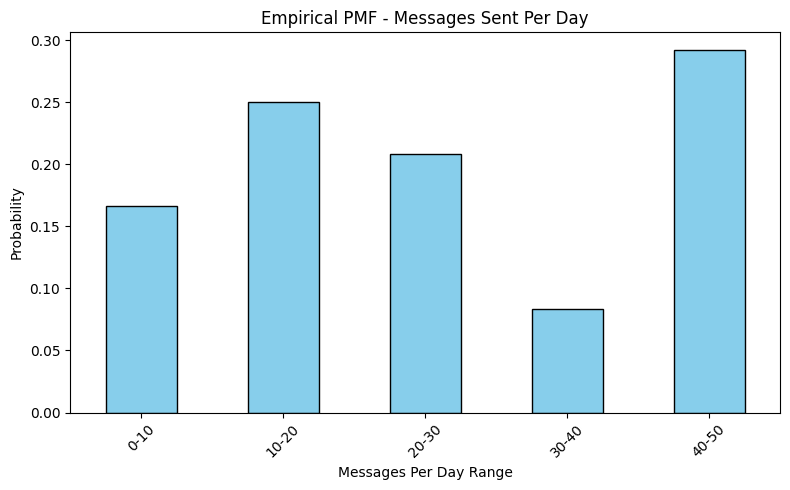

In [ ]:
# STEP 6: Plot Empirical PMF
plt.figure(figsize=(8, 5))
pmf_table["Empirical PMF"].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Empirical PMF - Messages Sent Per Day")
plt.xlabel("Messages Per Day Range")
plt.ylabel("Probability")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
# STEP 7: Estimate Mean and Variance using Midpoints
midpoints = {
    "0-10": 5,
    "10-20": 15,
    "20-30": 25,
    "30-40": 35,
    "40-50": 45
}

In [ ]:
# Add midpoints to the PMF table
pmf_table["Midpoint"] = pmf_table.index.map(midpoints)

In [ ]:
# Estimate sample mean
mean_estimate = (pmf_table["Midpoint"] * pmf_table["Empirical PMF"]).sum()

In [ ]:
# Estimate sample variance
E_X2 = ((pmf_table["Midpoint"]**2) * pmf_table["Empirical PMF"]).sum()
variance_estimate = E_X2 - (mean_estimate**2)

print(f"Estimated Mean: {mean_estimate:.2f}")
print(f" Estimated Variance: {variance_estimate:.2f}")

Estimated Mean: 25.83
 Estimated Variance: 215.97


In [ ]:
# STEP 8: Summary & Reflection
reflection = """
Reflection:
This variable measures daily messaging habits, useful for understanding digital behavior trends.
- Estimated Mean Messages/Day ≈ 25.83
- Variance ≈ 216

Challenges:
- Using ranges (0–10, 10–20, etc.) instead of exact numbers reduced precision.
- A better approach could be asking for exact message counts.

Improvement:
- More precise data could allow Poisson or Binomial modeling.
- Still, this basic analysis gives a useful overview of user behavior distribution.
"""
print(reflection)


Reflection:
This variable measures daily messaging habits, useful for understanding digital behavior trends.
- Estimated Mean Messages/Day ≈ 25.83
- Variance ≈ 216

Challenges:
- Using ranges (0–10, 10–20, etc.) instead of exact numbers reduced precision.
- A better approach could be asking for exact message counts.

Improvement:
- More precise data could allow Poisson or Binomial modeling.
- Still, this basic analysis gives a useful overview of user behavior distribution.

